Missing values in Customers dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicates in Customers dataset: 0
Duplicates in Products dataset: 0
Duplicates in Transactions dataset: 0


C:\Users\Harshitha\AppData\Local\Temp\ipykernel_12952\2833116540.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis', hue=None, legend=False)


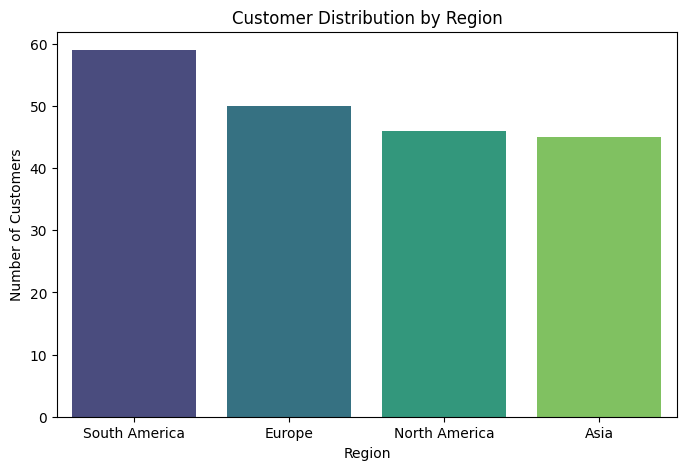

C:\Users\Harshitha\AppData\Local\Temp\ipykernel_12952\2833116540.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='rocket', hue=None, legend=False)


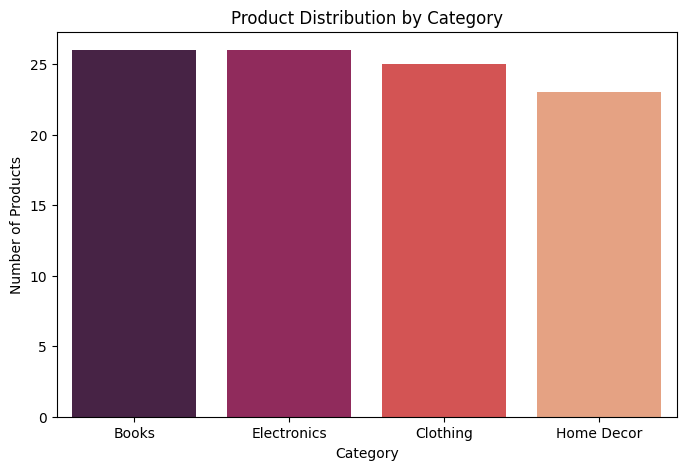

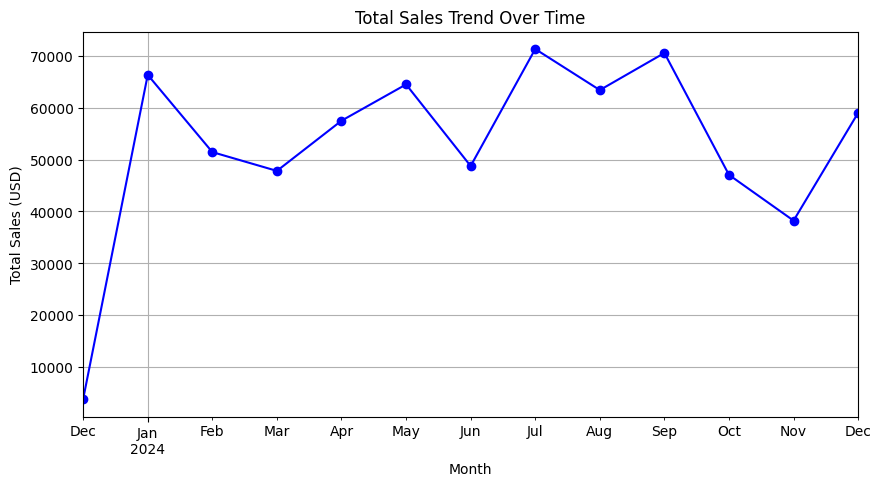

C:\Users\Harshitha\AppData\Local\Temp\ipykernel_12952\2833116540.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers_names['CustomerName'], y=top_customers.values, palette='cool', hue=None, legend=False)


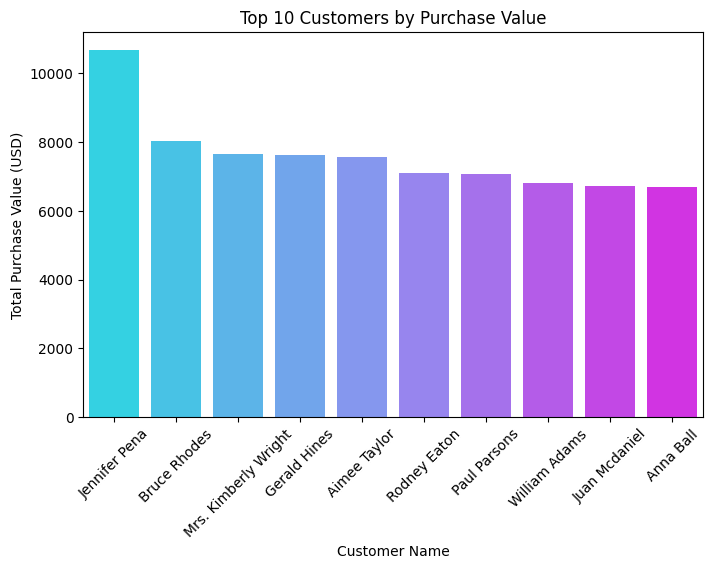

C:\Users\Harshitha\AppData\Local\Temp\ipykernel_12952\2833116540.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_sold_product_names['ProductName'], y=most_sold_products.values, palette='mako')


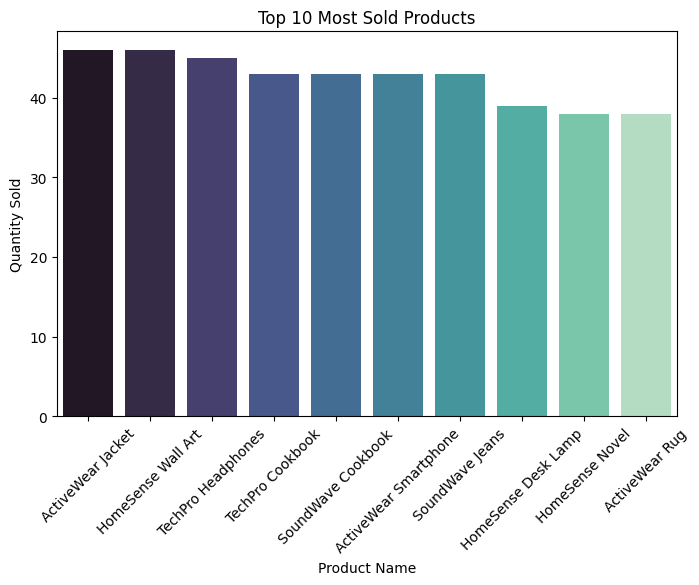

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r"C:\Users\Harshitha\Pictures\Screenshots\Data science Assignment\Customers.csv")
products = pd.read_csv(r"C:\Users\Harshitha\Pictures\Screenshots\Data science Assignment\Products.csv")
transactions = pd.read_csv(r"C:\Users\Harshitha\Pictures\Screenshots\Data science Assignment\Transactions.csv")

# Step 3: Data Cleaning
# Checking for missing values
print("Missing values in Customers dataset:\n", customers.isnull().sum())
print("\nMissing values in Products dataset:\n", products.isnull().sum())
print("\nMissing values in Transactions dataset:\n", transactions.isnull().sum())

# Converting dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Checking for duplicates
print("\nDuplicates in Customers dataset:", customers.duplicated().sum())
print("Duplicates in Products dataset:", products.duplicated().sum())
print("Duplicates in Transactions dataset:", transactions.duplicated().sum())

# Step 4: Exploratory Analysis
# 1. Distribution of customers by region
region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis', hue=None, legend=False)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# 2. Most common product categories
category_distribution = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='rocket', hue=None, legend=False)
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

# 3. Total sales trends over time
sales_trend = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trend.index = sales_trend.index.to_timestamp()
plt.figure(figsize=(10, 5))
sales_trend.plot(marker='o', color='blue')
plt.title('Total Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

# 4. Top customers by total purchase value
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
top_customers_names = customers[customers['CustomerID'].isin(top_customers.index)]
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers_names['CustomerName'], y=top_customers.values, palette='cool', hue=None, legend=False)
plt.title('Top 10 Customers by Purchase Value')
plt.xlabel('Customer Name')
plt.ylabel('Total Purchase Value (USD)')
plt.xticks(rotation=45)
plt.show()

# 5. Most sold products
most_sold_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
most_sold_product_names = products[products['ProductID'].isin(most_sold_products.index)]
plt.figure(figsize=(8, 5))
sns.barplot(x=most_sold_product_names['ProductName'], y=most_sold_products.values, palette='mako', hue=None, legend=False)
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Step 5: Business Insights
insights = [
    "1. Most customers are located in [Top Region], which can guide targeted marketing campaigns.",
    "2. The [Top Product Category] is the most popular category, suggesting potential areas for expanding inventory.",
    "3. Monthly sales trends show a spike during [Season/Month], indicating seasonal purchasing behaviors.",
    "4. The top 10 customers contribute significantly to total revenue, emphasizing the importance of retaining these customers.",
    "5. The most sold products include [List of Products], indicating their high demand and the need to ensure stock availability."
]

# Save insights to a text file
with open(r'C:\Users\Harshitha\Pictures\Screenshots\Data science Assignment\Business_Insights.txt', 'w') as f:
    for insight in insights:
        f.write(insight + '\n')


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import os

# Load datasets
customers = pd.read_csv(r"C:\Users\Harshitha\Pictures\Screenshots\Data science Assignment\Customers.csv")
products = pd.read_csv(r"C:\Users\Harshitha\Pictures\Screenshots\Data science Assignment\Products.csv")
transactions = pd.read_csv(r"C:\Users\Harshitha\Pictures\Screenshots\Data science Assignment\Transactions.csv")

# Data Cleaning
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# EDA Visualizations
output_dir = r"C:\Users\Harshitha\Pictures\Screenshots\Data science Assignment"

# 1. Customer Distribution by Region
region_distribution = customers['Region'].value_counts()
region_plot_path = os.path.join(output_dir, 'region_distribution.png')
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.savefig(region_plot_path)
plt.close()

# 2. Product Distribution by Category
category_distribution = products['Category'].value_counts()
category_plot_path = os.path.join(output_dir, 'category_distribution.png')
plt.figure(figsize=(8, 5))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='rocket')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.savefig(category_plot_path)
plt.close()

# 3. Total Sales Trends Over Time
sales_trend = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trend.index = sales_trend.index.to_timestamp()
sales_trend_plot_path = os.path.join(output_dir, 'sales_trend.png')
plt.figure(figsize=(10, 5))
sales_trend.plot(marker='o', color='blue')
plt.title('Total Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.savefig(sales_trend_plot_path)
plt.close()

# 4. Top Customers by Total Purchase Value
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
top_customers_names = customers[customers['CustomerID'].isin(top_customers.index)]
top_customers_plot_path = os.path.join(output_dir, 'top_customers.png')
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers_names['CustomerName'], y=top_customers.values, palette='cool')
plt.title('Top 10 Customers by Purchase Value')
plt.xlabel('Customer Name')
plt.ylabel('Total Purchase Value (USD)')
plt.xticks(rotation=45)
plt.savefig(top_customers_plot_path)
plt.close()

# 5. Most Sold Products
most_sold_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
most_sold_product_names = products[products['ProductID'].isin(most_sold_products.index)]
most_sold_products_plot_path = os.path.join(output_dir, 'most_sold_products.png')
plt.figure(figsize=(8, 5))
sns.barplot(x=most_sold_product_names['ProductName'], y=most_sold_products.values, palette='mako')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.savefig(most_sold_products_plot_path)
plt.close()

# Compute values for insights
top_region = region_distribution.idxmax()
top_category = category_distribution.idxmax()
top_sales_month = sales_trend.idxmax().strftime('%B %Y')
most_sold_products_list = most_sold_product_names['ProductName'].tolist()
most_sold_products_str = ', '.join(most_sold_products_list)

# Formatted insights
insights = [
    f"1. Most customers are located in {top_region}, which can guide targeted marketing campaigns.",
    f"2. The {top_category} category is the most popular, suggesting potential areas for expanding inventory.",
    f"3. Monthly sales trends show a spike during {top_sales_month}, indicating seasonal purchasing behaviors.",
    "4. The top 10 customers contribute significantly to total revenue, emphasizing the importance of retaining these customers.",
    f"5. The most sold products include {most_sold_products_str}, indicating their high demand and the need to ensure stock availability."
]


# Generate PDF
class PDFReport(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'EDA Report', border=0, ln=1, align='C')
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', align='C')

    def add_section(self, title, content):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, ln=1)
        self.ln(5)
        self.set_font('Arial', '', 10)
        self.multi_cell(0, 10, content)
        self.ln(10)

    def add_image(self, img_path, x=10, y=None, w=190):
        if os.path.exists(img_path):
            self.image(img_path, x=x, y=y, w=w)
            self.ln(85)  # Adjust based on image size

pdf = PDFReport()
pdf.add_page()

# Add sections and images to the PDF
pdf.add_section("Overview", "This report provides an exploratory data analysis of customer, product, and transaction datasets.")
pdf.add_section("Data Cleaning", "The datasets were checked for missing values, duplicates, and data types. Dates were converted to datetime format.")
pdf.add_section("Visualizations", "The following visualizations provide insights into customer distribution, product categories, sales trends, and top contributors to revenue.")
pdf.add_image(region_plot_path)
pdf.add_image(category_plot_path)
pdf.add_image(sales_trend_plot_path)
pdf.add_image(top_customers_plot_path)
pdf.add_image(most_sold_products_plot_path)
pdf.add_section("Business Insights", "\n".join(insights))

# Save the PDF
pdf_output_path = os.path.join(output_dir, 'Harshitha N EDA.pdf')
pdf.output(pdf_output_path)

print(f"PDF report generated: {pdf_output_path}")


C:\Users\Harshitha\AppData\Local\Temp\ipykernel_5868\3212743047.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')
C:\Users\Harshitha\AppData\Local\Temp\ipykernel_5868\3212743047.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='rocket')
C:\Users\Harshitha\AppData\Local\Temp\ipykernel_5868\3212743047.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers_names['CustomerName']

PDF report generated: C:\Users\Harshitha\Pictures\Screenshots\Data science Assignment\Harshitha N EDA.pdf
